In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from skimage.data import horse

img_raw = horse().astype('uint8')
img_raw = np.ones(img_raw.shape) - img_raw

img = img_raw.copy().astype('uint8')

contours, hierachy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

In [31]:
img = cv2.imread('heart3.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
thresh, im_bw = cv2.threshold(img, 128, 255, 0)

contours, hierachy = cv2.findContours(im_bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_KCOS)

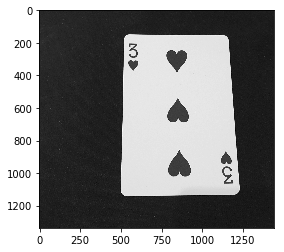

In [25]:
plt.imshow(img, cmap = 'gray')

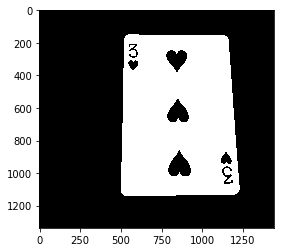

In [32]:
plt.imshow(im_bw, cmap = 'gray')

In [30]:
contours[0]

array([[[1411, 1277]]], dtype=int32)

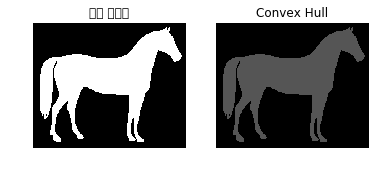

In [10]:
img4 = img_raw.copy().astype('uint8')

c0 = contours[0]
hull = cv2.convexHull(c0)
image4 = cv2.drawContours(img4, [hull], 0, 3)
titles = ['원본 이미지', 'Convex Hull']
images = [img_raw, img4]

for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(titles[i])
    plt.imshow(images[i], 'gray')
    plt.axis('off')

plt.show()

In [16]:
contours

[array([[[   0,    0]],
 
        [[   0, 1336]],
 
        [[1439, 1336]],
 
        [[1439,    0]]], dtype=int32)]

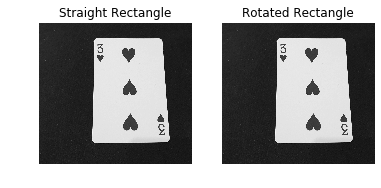

In [12]:
img1 = img.copy().astype("uint8")
img2 = img.copy().astype("uint8")

# Straight Rectangle
x, y, w, h = cv2.boundingRect(c0)
img1 = cv2.rectangle(img1, (x, y), (x+w, y+h), 7)

# Rotated Rectangle
rect = cv2.minAreaRect(c0)
box = cv2.boxPoints(rect)
box = box.astype('int')
img2 = cv2.drawContours(img2, [box], -1, 7) # blue

plt.subplot(1,2,1)
plt.imshow(img1, cmap="gray")
plt.axis('off')
plt.title("Straight Rectangle")
plt.subplot(1,2,2)
plt.imshow(img2, cmap="gray")
plt.axis('off')
plt.title("Rotated Rectangle")
plt.show()

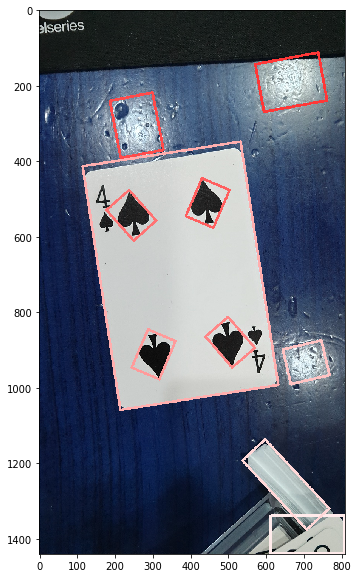

In [62]:
image = cv2.imread('spade4.jpg')
im_bw = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
thresh, im_bw = cv2.threshold(im_bw, 170, 255, 0)
contours, hierarchy = cv2.findContours(im_bw.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

rects = [cv2.minAreaRect(each) for each in contours]
rects = [(a,b,c) for a, b, c  in rects if ((b[0]*b[1]>5000))]
img = image.copy()
col = 0
for rect in rects:
    col +=20
    box = cv2.boxPoints(rect)
    box = box.astype('int')
    img = cv2.drawContours(img, [box], -1, (255, 255- col, 255- col), 5)
plt.figure(figsize=(20,10))
plt.imshow(img)

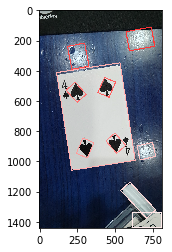

In [71]:
plt.imshow(img)

In [89]:
img.shape

(1440, 810, 3)

In [94]:
img[100:300].shape

(200, 810, 3)

In [98]:
img[100:300][100:][0].shape

(810, 3)

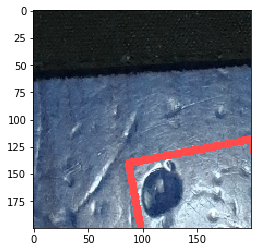

In [99]:
plt.imshow(img[100:300, 100:300,])

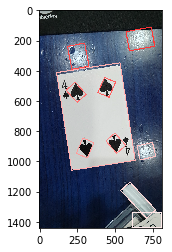

In [112]:
plt.imshow(img)

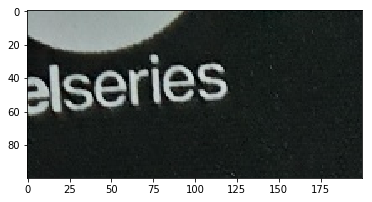

In [122]:
plt.imshow(img[0:100, 0:200,:])

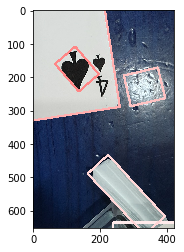

In [121]:
plt.imshow(img[703:703+652,374:374+422, :])

In [117]:
rects[3]

((374.48828125, 703.3564453125),
 (422.9815979003906, 652.0819091796875),
 -8.868263244628906)

In [42]:
r = np.array(rects)

In [50]:
for i in r:
    print(i[1][0]* i[1][1])

19796.0
20526.579647879116
9941.430264539667
275818.6479067616
8712.968935326906
8631.89486681018
8579.566370417364
8647.769309213385
17784.281619226676
21715.36967041786


In [51]:
for i in r:
    print(i[1][0], i[1][1])

196.0 101.0
82.09022521972656 250.04901123046875
104.84275817871094 94.8222885131836
422.9815979003906 652.0819091796875
109.53389739990234 79.54586791992188
79.23422241210938 108.94149780273438
79.5155029296875 107.89803314208984
109.3502197265625 79.08323669433594
115.47638702392578 154.00794982910156
169.41505432128906 128.1785125732422


In [53]:
r.shape

(10, 3)

In [56]:
r[1][0]

(653.4085693359375, 1256.1558837890625)